*1. Regression Models:*

Train and evaluate linear regression models to predict cholesterol levels.

Tasks:
1. Use R² and RMSE as evaluation metrics.
2. For linear regression: Implement ElasticNet. Experiment with varying regularization
parameters (alpha and l1_ratio) and observe their effects on model coefficients and performance.
3. Create a heatmap (see documentation for seaborn.heatmap) of R2 and RMSE across a range of alpha and l1_ratio. Use clear labels and a color bar to guide interpretation.
4. Identify the top-performing configuration based on the evaluation metrics.


In [2]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import ElasticNet, LogisticRegression


In [3]:
def impute_missing_values(data, strategy='mean'):
    """
    Fill missing values in the dataset & perform one-hot enconding.
    :param data: pandas DataFrame
    :param strategy: str, imputation method ('mean', 'median', 'mode')
    :return: pandas DataFrame
    """

    data2=data.copy()

    numericCols=[]
    factoredCols=[]
    colNames=list(data2.columns.values)
    # do NOT manipulate 'target' column; needed for y_train in lin_regression 

    #categorise cols by numerical or factored dtype
    for col in colNames:
        #delete cols missing 50% of data
        if pd.isnull(data2[col]).sum()>=(len(data2[col]))*.5:
            data2=data2.drop(columns=col)
        elif data2[col].dtype == 'object':
            factoredCols.append(col)
        else:
            numericCols.append(col)

        
    for col in numericCols:
        if strategy == 'mean':
            data2[col].fillna(data2[col].mean(), inplace=True)
        elif strategy=='mode':
            data2[col].fillna(data2[col].mode(), inplace=True)
        elif strategy =='median':
            data2[col].fillna(data2[col].mdeian(), inplace=True)

    
    #fill in for categorical variables?
    for col in factoredCols:
        data2[col]=data2[col].fillna(stats.mode(data2[col])) #inplace=True not working so we directly reassign

    # one hot encoding
    data2 = pd.get_dummies(data2, drop_first=False)
    
    return data2

In [4]:
data0=pd.read_csv("../Data/heart_disease_uci.csv")
data=pd.DataFrame(data0.copy())

# remove rows missing target data
data = data.dropna(subset=["chol"])
# was using << copy()[data["chol"].notna()] >> but this is indexing and takes more memory

# impute missing values + one-hot encoding of feature data
X = impute_missing_values(data.drop("chol", axis=1)) # features only, dont change the target data
y = data["chol"] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# elastic net linear regression model
elastic = ElasticNet(alpha=0.01,l1_ratio=0.1)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

C:\Users\liv_u\AppData\Local\Temp\ipykernel_26876\459073217.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2[col].fillna(data2[col].mean(), inplace=True)
C:\Users\liv_u\AppData\Local\Temp\ipykernel_26876\459073217.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2[col]=data2[col].fillna(stats.

Root Mean Squared Error: 71.90095170395857
R^2 Score: 0.5904679236631998


                                            rmse  r^2 (*100%)
ElasticNet(alpha=0.01, l1_ratio=0.01)  71.901559    59.046100
ElasticNet(alpha=0.01, l1_ratio=0.1)   71.900952    59.046792
ElasticNet(alpha=0.1, l1_ratio=0.01)   77.939601    51.878961
ElasticNet(alpha=0.1, l1_ratio=0.1)    77.248929    52.728043
ElasticNet(alpha=0.1, l1_ratio=0.55)   73.651710    57.028124
ElasticNet(alpha=0.5, l1_ratio=0.55)   85.696502    41.823869


<Axes: >

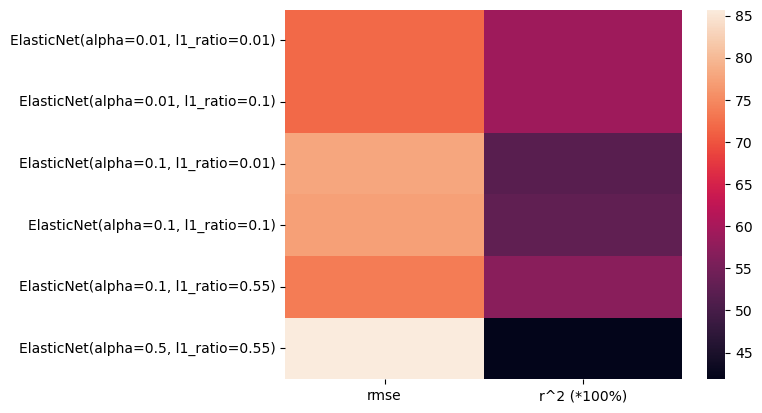

In [5]:
# Optimising alpha and l1_ratio parameters
elastic01 = ElasticNet(alpha=0.01,l1_ratio=0.01)
elastic01.fit(X_train, y_train)
y_pred01 = elastic01.predict(X_test)

elastic1_01 = ElasticNet(alpha=0.1,l1_ratio=0.01)
elastic1_01.fit(X_train, y_train)
y_pred1_01 = elastic1_01.predict(X_test)

elastic01_1 = ElasticNet(alpha=0.01,l1_ratio=0.1)
elastic01_1.fit(X_train, y_train)
y_pred01_1 = elastic01_1.predict(X_test)

elastic1 = ElasticNet(alpha=0.1,l1_ratio=0.1)
elastic1.fit(X_train, y_train)
y_pred1 = elastic1.predict(X_test)

elastic1_5 = ElasticNet(alpha=0.1,l1_ratio=0.55)
elastic1_5.fit(X_train, y_train)
y_pred1_5 = elastic1_5.predict(X_test)

elastic5 = ElasticNet(alpha=0.5,l1_ratio=0.55)
elastic5.fit(X_train, y_train)
y_pred5 = elastic5.predict(X_test)

# Evaluations
rmse01 = root_mean_squared_error(y_test, y_pred01)
r201 = r2_score(y_test, y_pred01)*100

rmse1_01 = root_mean_squared_error(y_test, y_pred1_01)
r21_01 = r2_score(y_test, y_pred1_01)*100

rmse01_1 = root_mean_squared_error(y_test, y_pred01_1)
r201_1 = r2_score(y_test, y_pred01_1)*100

rmse1 = root_mean_squared_error(y_test, y_pred1)
r21 = r2_score(y_test, y_pred1)*100

rmse1_5 = root_mean_squared_error(y_test, y_pred1_5)
r21_5 = r2_score(y_test, y_pred1_5)*100

rmse5 = root_mean_squared_error(y_test, y_pred5)
r25 = r2_score(y_test, y_pred5)*100

# make dict >> df >> heatmap
evals={elastic01:[rmse01, r201], elastic01_1:[rmse01_1, r201_1], elastic1_01:[rmse1_01, r21_01], elastic1:[rmse1, r21], elastic1_5:[rmse1_5, r21_5], elastic5:[rmse5, r25]}
evals=pd.DataFrame.from_dict(evals, orient='index')
evals.rename(columns={0:"rmse", 1:"r^2 (*100%)"}, inplace=True)

# evals.shape()
print(evals)
sns.heatmap(evals) # needs 2D input that can be coerced into df

The best performing configurations from the above parameters are alpha=0.01, l1_ratio=0.01 and alpha=0.01, l1_ratio=0.1, both of which have almost the exact same evaluation metrics. These combos have the lowest RMSE and highest R^2, indicating lower variability and higher accuracy.
We can confirm this by testing more variations using the GridSearchCV() method below, which returns {'alpha': 0.01, 'l1_ratio': 0.01} as the best performing combination. 

In [ ]:
# tuning hyperparameters
param_alpha_l1 = {'alpha': [0.01, 0.1, 0.5, 0.8, 0.9, 1.0, 2.0], 'l1_ratio': [0.01, 0.1, 0.3, 0.6, 0.99, 1.5, 3]}

# INSTANTIATE grid search
# cv=5: cross validation; split data into 5 subsets, train on 4, test on 1 but like using each subset as a test set to the prior training
grid_alpha_l1 = GridSearchCV(ElasticNet(), param_alpha_l1, cv=5, scoring='accuracy')
grid_alpha_l1.fit(X_train, y_train)

print(f"Best parameters for ElasticNet: {grid_alpha_l1.best_params_}")


Messy output but the gridsearch return best params based on 'accuracy' as: \
`Best parameters for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.01}`


*2. Classification Models*

Train and evaluate logistic regression and k-NN classifiers to predict heart disease
presence as a binary classification task.

From data source:\
"column num: diagnosis of heart disease (angiographic disease status), where Value 0 is < 50% diameter narrowing; [we want to] distinguish presence (values 1,2,3,4) from absence (value 0)"

In [ ]:
# Heart Data Preprocessing
# predict heart disease presence (col ='num') as a binary classification task.
data=pd.DataFrame(data0.copy())
# remove rows missing target data
data = data.dropna(subset=["num"]) # already not missing any target data

# impute missing values + one-hot encoding of feature data
X = impute_missing_values(data.drop("num", axis=1)) # features only, dont change the target data
# change target to binary
# presence (values 1,2,3,4) absence (value 0)
data['num'] = np.where(data['num'] == 0, 0, 1)  #where value == 0, change value to 0, otherwise change value to 1
y = data["num"] # target
print(y.value_counts())
print(y.describe())
# print(((y==1))/len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\liv_u\AppData\Local\Temp\ipykernel_26876\459073217.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2[col].fillna(data2[col].mean(), inplace=True)


num
1    509
0    411
Name: count, dtype: int64
count    920.000000
mean       0.553261
std        0.497426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: num, dtype: float64


C:\Users\liv_u\AppData\Local\Temp\ipykernel_26876\459073217.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2[col]=data2[col].fillna(stats.mode(data2[col])) #inplace=True not working so we directly reassign


Tasks:
1. Use accuracy, F1 score, AUROC, and AUPRC as evaluation metrics.

2. For logistic regression:
- Use LogisticRegression. Experiment with varying parameters (penalty and solver) and observe their effects on model coefficients and performance.
- Plot AUROC and AUPRC curves for the model’s best configuration.


In [ ]:
def plot_curves(tpr,fpr,auroc,precision,recall,auprc,model_name,minority_class=0.2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot ROC curve
    ax1.plot(fpr, tpr, color='green', lw=2, label='AUROC = %0.2f' % auroc)
    # plot random line (diagonal)
    ax1.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
    # axes limits
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    # axes labels
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('{} ROC Curve'.format(model_name))
    # legend location
    ax1.legend(loc='lower right')

    # Plot Precision-Recall curve
    ax2.plot(recall, precision, color='purple', lw=2, label='AUPRC = %0.2f' % auprc)
    # plot random line (horizontal)
    ax2.axhline(y=minority_class, color='red', lw=2, linestyle='--', label='Random')
    # axes labels
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('{} Precision-Recall Curve'.format(model_name))
    ax2.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


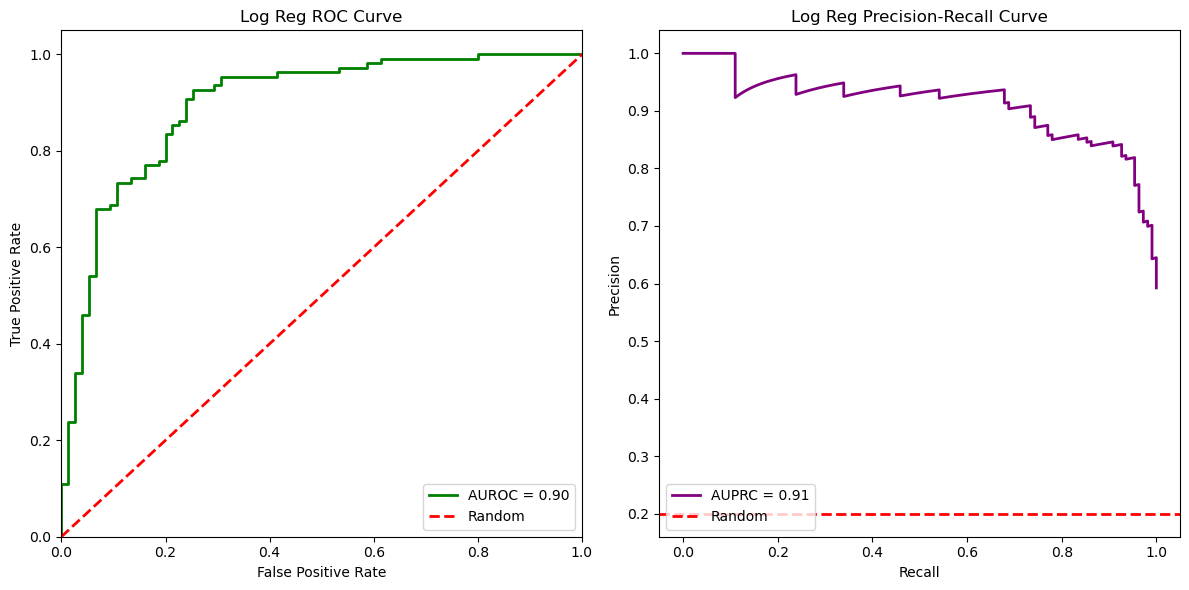

Log Reg - Accuracy: 0.83, F1 Score: 0.85


In [9]:
# roc = receiver operating characteristic; common plot for evalutaing
# auc = area under [roc] curve; 0 == poor, 0.5 == random, 1 == perfect
# precision recall + average precision interpretations depend on class imbalance bw variables 

# Instantiate, fit, predict
log_reg = LogisticRegression(C = 0.3, random_state=42)
log_reg.fit(X_train, y_train)

# Prediction as:
# probability (for curves)
y_scores = log_reg.predict_proba(X_test)[:, 1]
# value (for evaluation metrics)
y_pred = log_reg.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot ROC curve and Precision-Recall curve as subplots on the same figure
plot_curves(tpr,fpr,roc_auc,precision,recall,average_precision,'Log Reg')

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Log Reg - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")



3. For k-NN:
- Tune the hyperparameter n_neighbors (e.g., {1, 5, 10}) and compare its
impact on evaluation metrics.
- Plot AUROC and AUPRC curves for the model’s best configuration.

In [10]:
from sklearn.model_selection import GridSearchCV

# Optimise parameters using GridSearchCV
param_grid_knn = {'n_neighbors': [5, 10, 15, 18, 22, 27],'metric': ['euclidean', 'manhattan', 'minkowski']}

# Instantiate, fit 
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# print best parameters using .best_params_()
print(f"Best parameters for k-NN: {grid_search_knn.best_params_}")


Best parameters for k-NN: {'metric': 'manhattan', 'n_neighbors': 22}


c:\Users\liv_u\Desktop\GitHub\ML-AI\ML-AI\.pixi\envs\default\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


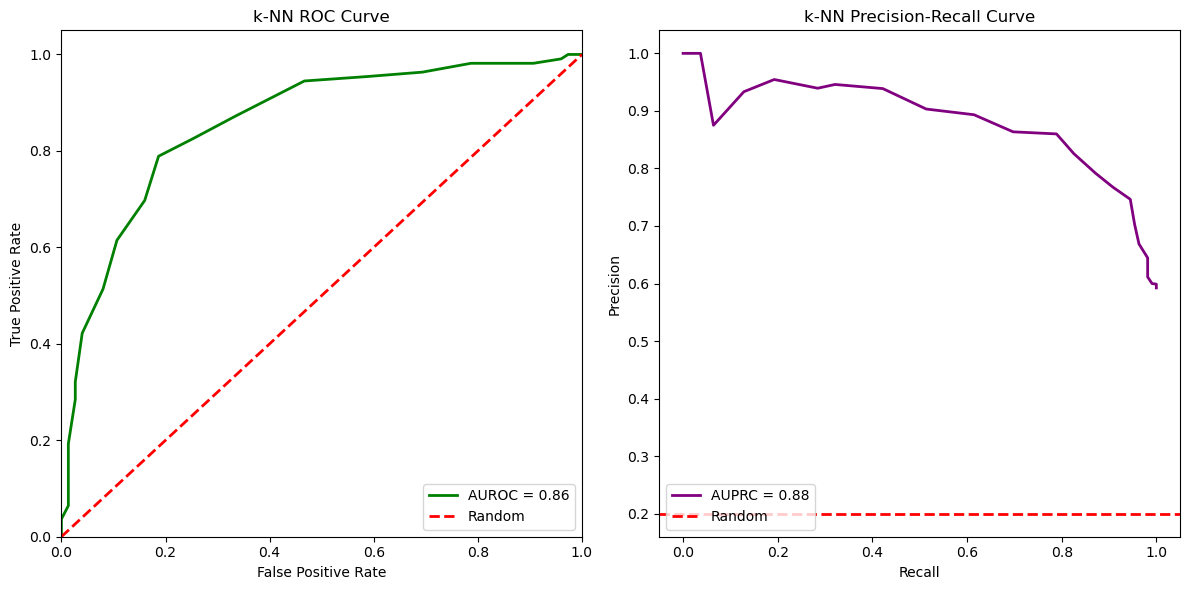

kNN - Accuracy: 0.80, F1 Score: 0.82


In [ ]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()
X_train_scaled = sdscaler.fit_transform(X_train)
X_test_scaled = sdscaler.transform(X_test) # shouldnt 'fit' to the test data bc we want to use the train data as the baseline for scaling

# Train a k-NN classifier
# INSTANTIATE, FIT, PREDICT
knn = KNeighborsClassifier(n_neighbors=22,metric='manhattan')
knn.fit(X_train, y_train)
# Prediction as:
# probability (for curves)
y_scores_knn = knn.predict_proba(X_test)[:, 1]
# value (for evaluation metrics)
y_pred =  knn.predict(X_test)

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute Precision-Recall curve
precision, recall, thresholds_knn = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plot_curves(tpr_knn,fpr_knn,roc_auc_knn,precision,recall,average_precision,'k-NN')

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print(f"kNN - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")
